# Métodos de búsqueda
## Algoritmos meta-heurísticos

* Los algoritmos metaheurísticos son algoritmos aproximados de optimización y búsqueda de propósito general.
* Son procedimientos iterativos que guían una heurística subordinada combinando de forma inteligente distintos conceptos para explorar y explotar adecuadamente el espacio de búsqueda.

Existe una serie de problemas reales de difícil solución que requieren de tareas tales como encontrar:
* el camino más corto entre varios puntos,
* un plan de mínimo coste para repartir mercancías a clientes,
* una asignación óptima de trabajadores a tareas a realizar,
* una secuencia óptima de proceso de trabajos en una cadena de producción,
* una distribución de tripulaciones de aviones con mínimo coste,
* ...

Estos problemas se caracterizan porque:
* suelen requerir agrupamientos, ordenaciones o asignaciones de un conjunto discreto de objetos que satisfagan ciertas restricciones,
* se encuentran en muchas áreas de aplicación,
* presentan una gran complejidad computacional
* así, los algoritmos exactos son ineficientes o simplemente imposibles de aplicar,
* en la práctica se resuelven mediante algoritmos aproximados que proporcionan buenas soluciones al problema en un tiempo razonable

---
**Referencias:**
* https://upcommons.upc.edu/bitstream/handle/2117/191405/int-metaheuriisticas-caepia-2009-5718.pdf
* Bo Yang, Jingbo Wang, Xiaoshun Zhang, Tao Yu, Wei Yao, Hongchun Shu, Fang Zeng, Liming Sun. _Comprehensive overview of meta-heuristic algorithm applications on PV cell parameter identification_. Energy Conversion and Management. Volume 208. 2020.
* https://web.archive.org/web/20111204041635/http://www.azc.uam.mx/publicaciones/enlinea2/3-2rec.htm

### Funcionamiento de las Metaheurísticas
Para obtener buenas soluciones, cualquier algoritmo de búsqueda debe establecer un balance adecuado entre dos características contrapuestas del proceso:
* **Intensificación:** cantidad de esfuerzo empleado en la búsqueda en la región actual (explotación del espacio).
* **Diversificación:** cantidad de esfuerzo empleado en la búsqueda en regiones distantes del espacio (exploración).

El equilibrio entre intensificación y diversificación es  necesario para:
* Identificar rápidamente regiones del espacio con soluciones de buena calidad.
* No consumir mucho tiempo en regiones del espacio no prometedoras o ya exploradas.

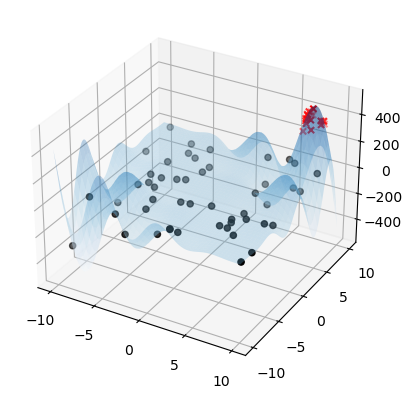

In [ ]:
#@markdown
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-10,10,1000)
y=np.linspace(-10,10,1000)
X,Y=np.meshgrid(x,y)
def z(x,y):
  return (np.sin(x)+np.sin(y))*(x+y)**2
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,z(X,Y),cmap='Blues',alpha=0.3)
#
# Exploración
x_num=np.random.uniform(-10,10,50)
y_num=np.random.uniform(-10,10,50)
ax.scatter(x_num,y_num,z(x_num,y_num),c='k')
#
# Explotación
x_num=np.random.uniform(7,9,20)
y_num=np.random.uniform(7,9,20)
ax.scatter(x_num,y_num,z(x_num,y_num),marker='x',c='r')

### Clasificación de meta-heurísticos

* Por su fuente de inspiración
* Por su estructura

#### Por su fuente de inspiración
* **Inspiración biológica**
    - _Evolución diferencial_: Consiste en cuatro fases: inicialización, mutación, cruce y selección. Cada vector de prueba varía en función de
    
    $$
    U_{ij,G}=b_{ij}V_{ij,G}+(1-b_{ij})X_{i,G}
    $$

    dada una función objetivo $X_{i,G}$ y un vector binario $b_{ij}$ que muta en función al criterio de cruce
    
    $$
    C=\frac{\sum_{j=1}^Db_{ij}}{D}
    $$

    - _Colonia artificial de abejas_: Busca la siguiente fuente de comida basado en la experiencia, siendo la fuente de comida una función de los parámetros de búsqueda usando una estrategia de aprendizaje, esto es
    
    $$
    u_s=x_s+r\cdot(x_s-x_j),\quad f(x_s)\leq f(x_j),
    $$

    $$
    u_s=x_s+r\cdot(x_j-x_s),\quad f(x_j)\leq f(x_s),
    $$

    para $j$ como una población de abejas grande y $r$ un vector aleatorio uniformemente distribuido.
    
    - _Algoritmo de optimización de ballenas_: Replica principalmente la búsqueda aleatoria de caza de las ballenas jorobadas, esto es, la estrategia de caza con red de burbujas. Se busca minimizar la distancia entre la presa y la ballena
    $$
    D=|C\cdot X_r-X_t|,
    $$
    siendo $X_r$ una posición aleatoria y $X_t$ la posición que minimiza la distancia en la iteración $t$. La siguiente posición se actualiza a
    $$
    X_{t+1}=X_r-A\cdot D,
    $$
    con $A$ y $C$ como coeficientes de ajuste.
    
* **Basados en la física**
    - _Optimización de enjambre de partículas_: Es un algoritmo de búsqueda paralelo aleatorio en el que las partículas se calientan siguiendo las direcciones óptimas globales e individuales para actualizar su velocidad y posición

    \begin{array}{l}
    x_{t+1}=x_t+v_t\\
    v_{t+1}=v_t+c_pr_p\cdot(x_p-x_t)+c_gr_g\cdot(x_g-x_t),
    \end{array}
    
    donde $c_p$ y $c_g$ son constantes de diseño, $x_p$ y $x_g$ son las mejores posiciones, particular y global, respectivamente.
    - _Enfriamiento simulado_: Basado en el proceso gradual de enfriamiento con el objetivo de lograr una cristalización. **Este es el algoritmo a estudiar**.

* **Basados en la sociología**
    - _Búsqueda armónica_: La estrategia de optimización de la búsqueda de armonía replica originalmente el proceso de improvisación de los músicos, en el que cada solución llamada armonía se especifica mediante un vector.
    $$
    x_{new}=l+r\cdot(u-l),
    $$
    donde $l$ y $u$ son los límites inferiores y superiores preestablecidos, y $r$ es una valor aleatorio uniformemente distribuído. Después de cada iteración, los vectores de armonía se almacenan en la memoria de armonía, mientras que una mejor armonía reemplazará la peor para garantizar armonías de alta calidad.
    

#### Por su estructura
* **Basadas en métodos constructivos**: Parten de una solución inicial vacía y van añadiéndole componentes hasta construir una solución
    - Procedimiento de búsqueda adaptativa aleatoria y voraz
    - Optimización basada en Colonias de hormigas
* **Basadas en trayectorias**: la heurística subordinada es un algoritmo de búsqueda local que sigue una trayectoria en el espacio de búsqueda. Parten de una solución inicial e iterativamente tratan de reemplazarla por otra solución de con mejor calidad
    - Búsqueda Local
    - Enfriamiento Simulado
* **Basadas en poblaciones**: el proceso considera múltiples puntos de búsqueda en el espacio que evolucionan en paralelo
    - Algoritmos Genéticos
    - PSO

##### Búsqueda basada en trayectorias
```
Procedimiento de Búsqueda Local
Inicio
GENERA(Solución Inicial)
Solución Actual = Solución Inicial;
Mejor Solución = Solución Actual;
Repetir
  Solución Vecina = GENERA_VECINO(Solución Actual);
  Si Acepta(Solución Vecina)  
    entonces Solución Actual = Solución Vecina;
  Si Objetivo(Solución Actual) es mejor que Objetivo(Mejor Solución)
    entonces Mejor Solución = Solución Actual;
Hasta(Criterio de parada);
DEVOLVER (Mejor Solución);
Fin
```
Existen tres opciones para salir de óptimos locales
* Permitir movimientos de empeoramiento de la solución actual
    - Enfriamiento Simulado
* Modificar la estructura de entornos
    - Búsqueda Descendente Basada en Entornos Variables
* Volver a comenzar la búsqueda desde otra solución inicial
    - Búsquedas Multiarranque
    - Optimización Basada en Colonia de Hormigas

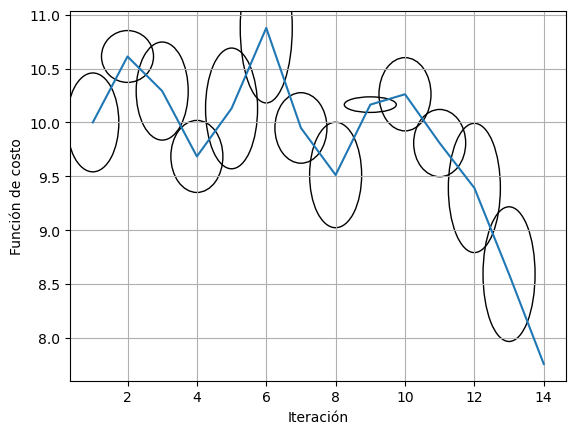

In [ ]:
#@markdown
from matplotlib.patches import Ellipse
fig,ax=plt.subplots()
N=15
x=np.arange(1,N)
def C(x):
  costo=[10]
  for i in x[:-1]:
    costo.append(costo[-1]+np.random.choice([-np.random.rand(),np.random.rand()],p=[0.8,0.2]))
  return costo
Cx=C(x)
plt.plot(x,Cx)
for i in range(N-2):
  a=Ellipse((x[i],Cx[i]),1.5,1.5*np.abs(Cx[i]-Cx[i+1]),fc='None',color='k')
  ax.add_artist(a)
plt.ylabel('Función de costo')
plt.xlabel('Iteración')
plt.grid()

# Algoritmo de Enfriamiento simulado
El objetivo es alcanzar un estado de mínima energía, o sea, minimizar $E(estado)$.
```
Inicio
estado = estado_0
Repetir desde T = Tmax hasta 0
  estado_new = GENERAR_VECINO(estado)
  Si P(E(estado_new)-E(estado), T) >= random(0, 1)
    entonces estado = estado_new
  T = T*tasa_enfriamiento
DEVOLVER estado
Fin
```
La probabilidad de aceptación es 1 si la energía nueva $E(estado_{new})$ es menor a la anterior $E(estado)$, de lo contrario, la probabilidad es $P(E(estado_{new}-E(estado)),T)=e^{-(E(estado_{new})-E(estado))/T}$, donde $T$ es la temperatura.

Note que al disminuir la temperatura, la probabilidad de aceptar estados con mayor energia también disminuye.

Ejemplo ilustrando la importancia del protocolo de enfriamiento:

El problema consiste en disponer los pixeles en la imagen de tal manera que se minimice una función de energía que causa que los colores similares se atraigan a distancias cortas y se repelan a distancias largas. En cada iteración se intercambian las posiciones de dos pixeles adyacentes.

![Imagen obtenida con un protocolo de enfriado rápido, equiparable al proceso de formación de sólidos amorfos.](https://upload.wikimedia.org/wikipedia/commons/8/82/SimulatedAnnealingFast.jpg)
![Imagen obtenida con un protocolo de enfriado lento, equiparables al proceso de formación de sólidos cristalinos.](https://upload.wikimedia.org/wikipedia/commons/8/8d/SimulatedAnnealingSlow.jpg)

---
Definir una función para buscar el estado que minimice la energía teniendo como argumentos:
* la función para generar la energía (función de costo),
* la función para generar el estado vecino,
* temperatura inicial,
* tasa de enfriamiento y
* el estado inicial.

In [ ]:
def enfriamiento_lin(E,generar_vecino,T0,DT,estado0):
  T=T0
  estado=estado0
  while T>0:
    estado_new=generar_vecino(estado)
    if np.exp(-(E(estado_new)-E(estado))/T)>np.random.rand():
      estado=estado_new
    T-=DT
  return estado

def enfriamiento_geom(E,generar_vecino,T0,alpha,estado0):
  T=T0
  estado=estado0
  while T>0.0001:
    estado_new=generar_vecino(estado)
    if np.exp(-(E(estado_new)-E(estado))/T)>np.random.rand():
      estado=estado_new
    T*=alpha
  return estado

**Ejemplo:**

Resolver el problema del viajante con 17 nodos usando _Enfriamiento simulado_

In [ ]:
import matplotlib.pyplot as plt

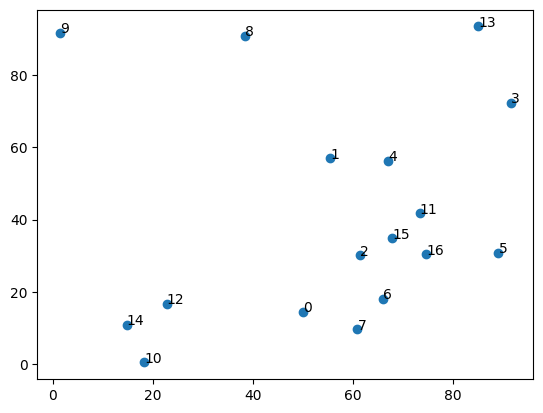

In [ ]:
ciudades=np.random.uniform(0,100,(17,2))
plt.scatter(ciudades[:,0],ciudades[:,1])
for i in range(len(ciudades)):
  plt.text(ciudades[i,0],ciudades[i,1],str(i))

In [ ]:
estado0=np.array(range(17))
np.random.shuffle(estado0)

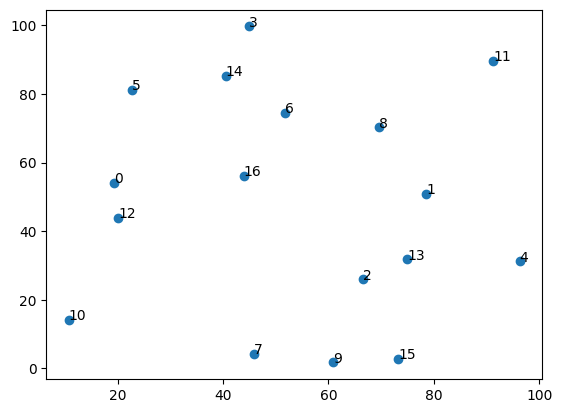

In [ ]:
ciudades=np.random.uniform(0,100,(17,2))
plt.scatter(ciudades[:,0],ciudades[:,1])
for i in estado0:
  plt.text(ciudades[i,0],ciudades[i,1],str(i))

In [ ]:
def distancia(estado):
  d=0
  for i in range(len(estado)-1):
    d += np.linalg.norm(ciudades[estado[i+1]]-ciudades[estado[i]])
  d += np.linalg.norm(ciudades[estado[0]]-ciudades[estado[-1]])
  return d

In [ ]:
distancia(estado0)

np.float64(929.4122330774138)

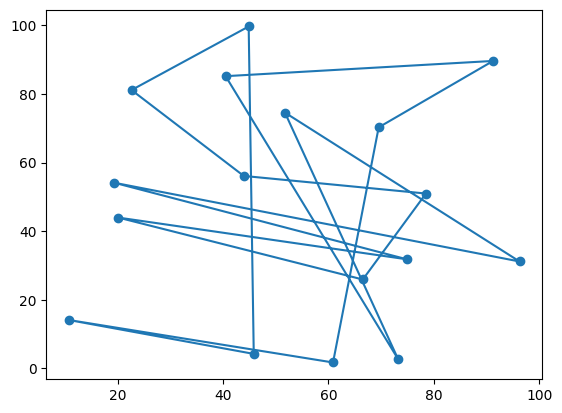

In [ ]:
plt.scatter(ciudades[:,0],ciudades[:,1])
plt.plot(ciudades[estado0,0],ciudades[estado0,1])
plt.plot([ciudades[estado0[-1],0],ciudades[estado0[0],0]],[ciudades[estado0[-1],1],ciudades[estado0[0],1]],'C0')

In [ ]:
def generar_vecino(estado):
  i,j=np.random.choice(len(estado),2,replace=False)
  estado_new=estado.copy()
  estado_new[i],estado_new[j]=estado_new[j],estado_new[i]
  return estado_new

In [ ]:
generar_vecino(estado0),estado0

(array([ 3,  5, 16,  1,  2, 12, 13,  8,  4,  6, 15, 14, 11,  0,  9, 10,  7]),
 array([ 3,  5, 16,  1,  2, 12, 13,  0,  4,  6, 15, 14, 11,  8,  9, 10,  7]))

np.float64(434.8924887285803)

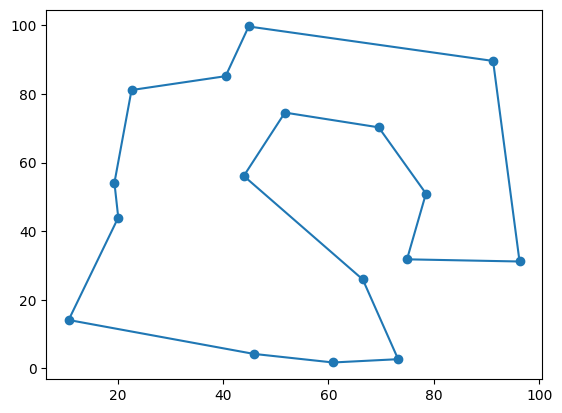

In [ ]:
estado_new=enfriamiento_geom(distancia,generar_vecino,1000,0.999,estado0)
plt.scatter(ciudades[:,0],ciudades[:,1])
plt.plot(ciudades[estado_new,0],ciudades[estado_new,1])
plt.plot([ciudades[estado_new[-1],0],ciudades[estado_new[0],0]],[ciudades[estado_new[-1],1],ciudades[estado_new[0],1]],'C0')
distancia(estado_new)

In [ ]:
estado0,estado_new

(array([ 3,  5, 16,  1,  2, 12, 13,  0,  4,  6, 15, 14, 11,  8,  9, 10,  7]),
 array([ 8,  1, 13,  4, 11,  3, 14,  5,  0, 12, 10,  7,  9, 15,  2, 16,  6]))